#### **Advancing Skin Disease Detection: Precision Classification for Effective Diagnosis**

HAM10000 DATASET

HAM10000 ("Human Against Machine with 10000 training images"), is a dataset created by 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
[1] Noel Codella, Veronica Rotemberg, Philipp Tschandl, M. Emre Celebi, Stephen Dusza, David Gutman, Brian Helba, Aadi Kalloo, Konstantinos Liopyris, Michael Marchetti, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection 2018: A Challenge Hosted by the International Skin Imaging Collaboration (ISIC)”, 2018; https://arxiv.org/abs/1902.03368
[2] Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi:10.1038/sdata.2018.161 (2018).

The dataset consists of dermatoscopic images, that is acquired from a diverse population. The dataset has 10 015 images, and the images are divided into: 
* HAM10000_images_part1.zip (5000 JPEG files)
* HAM10000_images_part2.zip (5015 JPEG files)

There are approximately 3000 to 5000 different skin conditions, but the dataset only includes:
*  Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
*  basal cell carcinoma (bcc)
*  benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
*  dermatofibroma (df)
*  melanoma (mel)
*  melanocytic nevi (nv)
*  vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)


But are shortened to:
* Melanocytic nevi
* Melanoma
* Benign keratosis-like lesions
* Basal cell carcinoma
* Actinic keratoses
* Vascular lesions
* Dermatofibroma


The meta-data includes important factors that may influence the results, such as the patients' age, and sex.  The region in which the disease is located is also revealed in the meta-data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

# Import Important libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

2024-08-11 17:33:58.460148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 17:33:58.460291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 17:33:58.631751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import datasets

# hmnist Dataset

The hmnist csv folders are all pixel descriptions and the L has fewer columns than the RGB folder

In [3]:
hmnist_28_L=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')
hmnist_28_L

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [4]:
hmnist_28_RGB=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
hmnist_28_RGB

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


# Meta-data

In [5]:
meta_data=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [6]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


There are 10 015 entries, and 7 columns.  

The age column has fewer entries than all the other columns

In [7]:
# Check for unique entries in each column
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [8]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [9]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

# Column description

* The lesion_id, has 7470 unique entries, this implies that there exist repetitive lesion_ids, because the dataset includes lesions with multiple images
* The image_id has 10 015 entries, this concludes that each image has a specific id. 
* The participants in the dataset belong to 18 different ages, and 3 different sexes, male female, and unknown. 
* The region of the disease is located in 15 different locations, this diversifies the dataset.  The locations are:
scalp, ear, face, back, trunk, chest,upper extremity, abdomen, unknown, lower extremity,genital,neck, hand, foot, acral

# Explaratory Data Analysis

In [10]:
meta_data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


Most of the columns in the dataset are categorical, so finding statistical analysis of these columns is difficult

In [11]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


Age is the only column with null entries

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


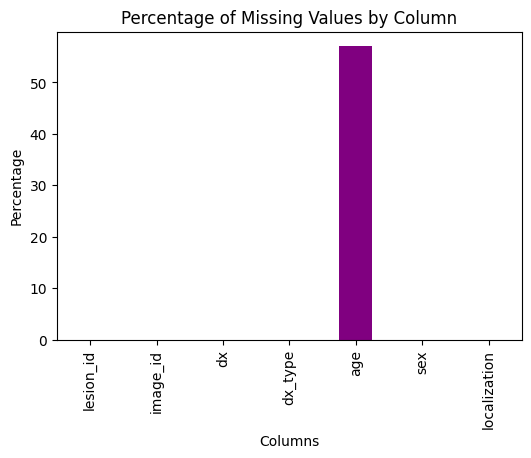

In [12]:
# 2. Bar Plot of Missing Values
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [13]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [14]:
# Distribution of value count for Location of disease
for column in categorical_columns:
    meta_data['localization'].value_counts()
    
meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

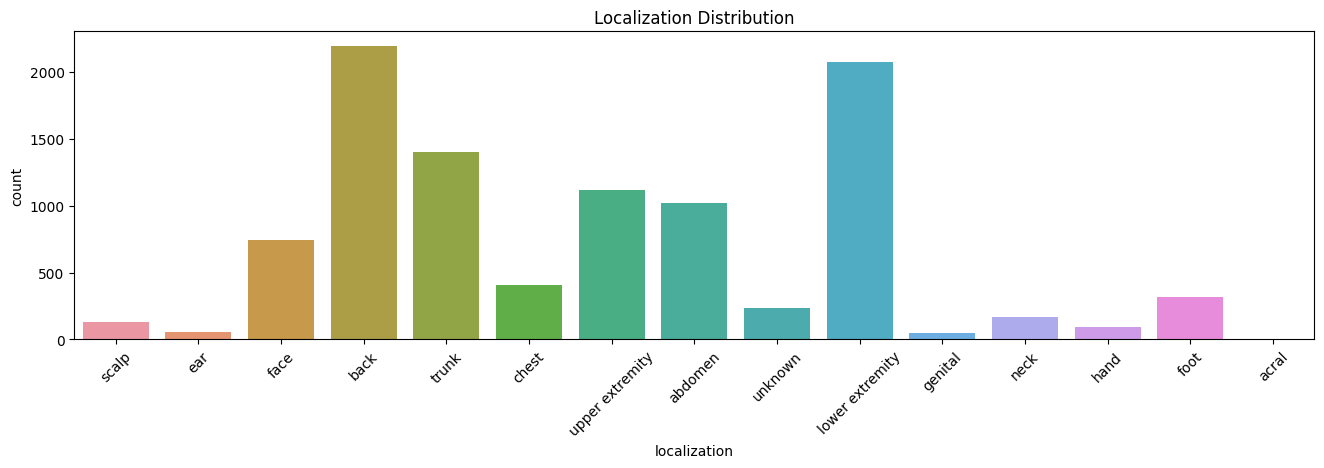

In [15]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

Majority of the skin conditions that exist in the dataset are located on the back

In [16]:
# Distribution of value count for Sex in the dataset
for column in categorical_columns:
    meta_data['sex'].value_counts()
    
meta_data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

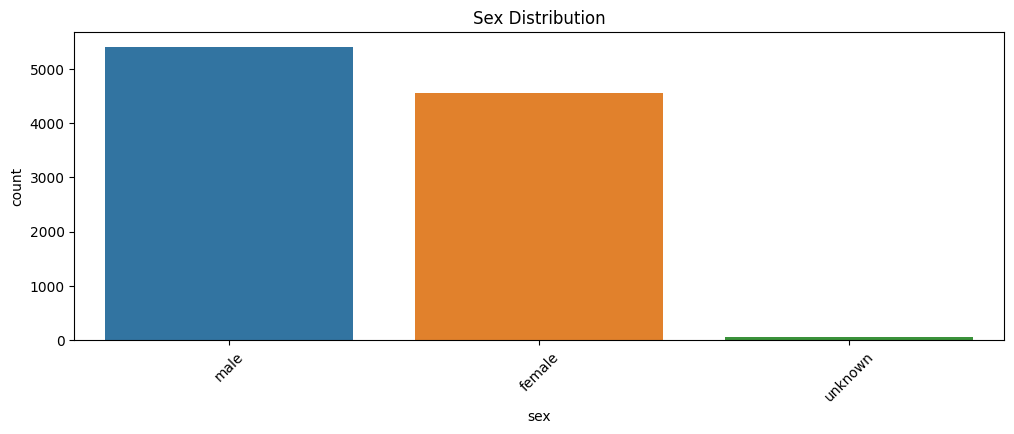

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

There are more males in the dataset, than females, and unknown gender

In [18]:
# Distribution of value count for Type of disease
for column in categorical_columns:
    meta_data['dx'].value_counts()
    
meta_data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

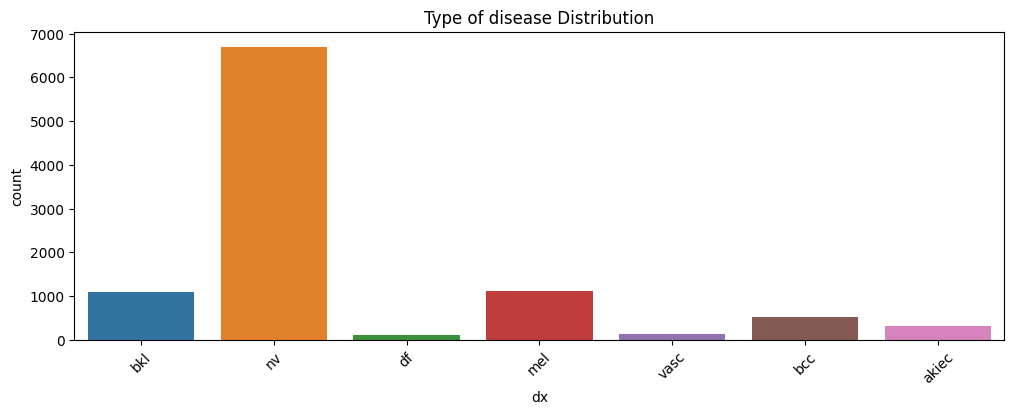

In [19]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

The skin condition that is more prevalent in the dataset is the melanocytic nevi

In [20]:
# Distribution of value count for Confirmation method of disease
for column in categorical_columns:
    meta_data['dx_type'].value_counts()
    
meta_data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

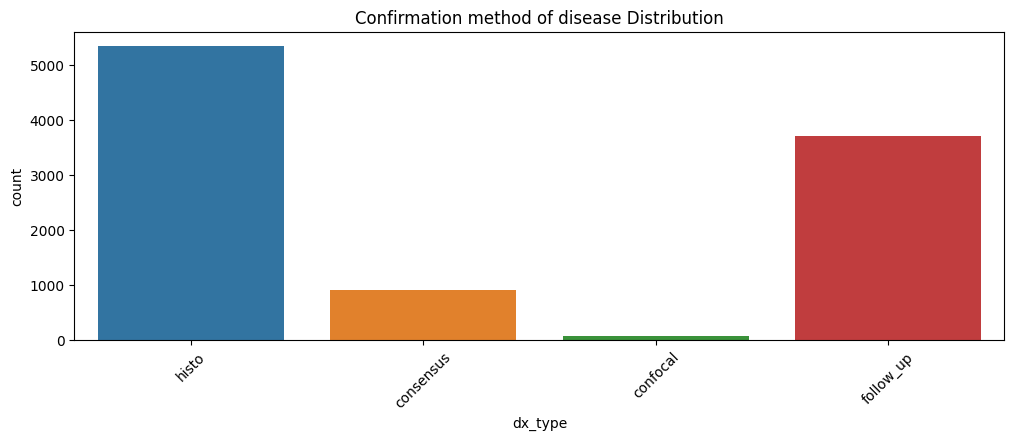

In [21]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

Most conditions are confirmed through histopathology (histo), secondandly through follow-up examination (follow_up), thirdly through expert consensus (consensus), and lastly through in-vivo confocal microscopy (confocal)

In [22]:
# Distribution of numerical columns
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


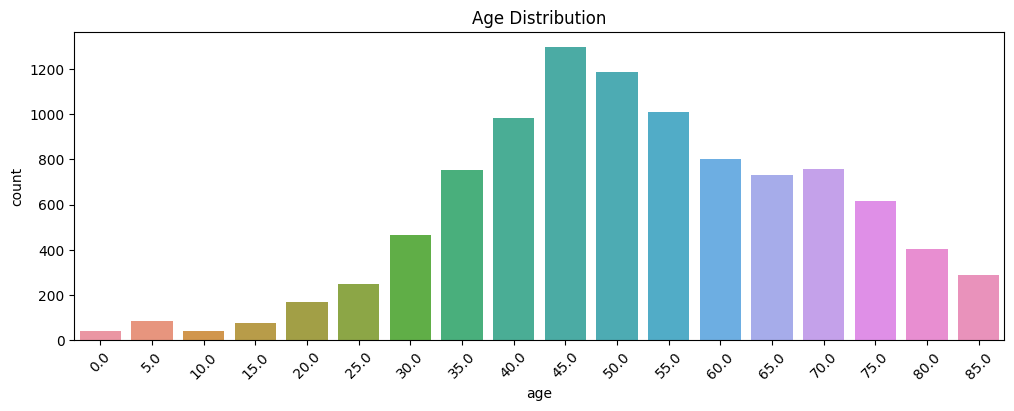

In [23]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

The most prominent age in the dataset, is 45

# Explaratpry Data Analysis for Relationship among variables

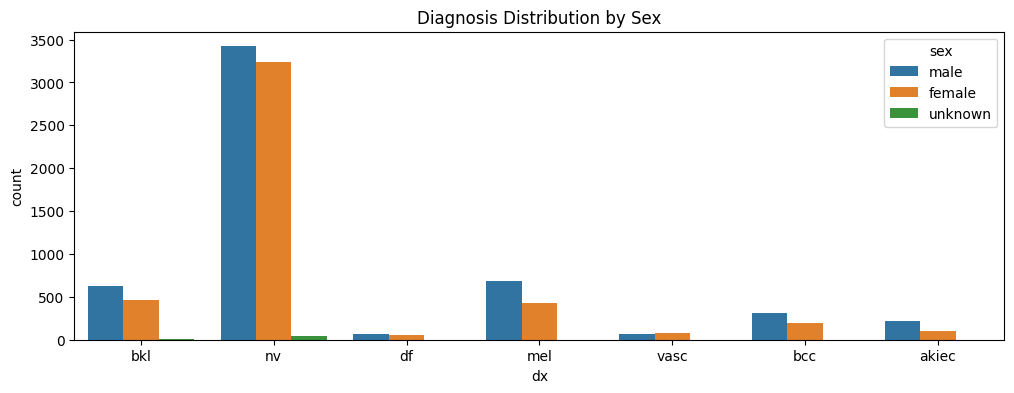

In [24]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

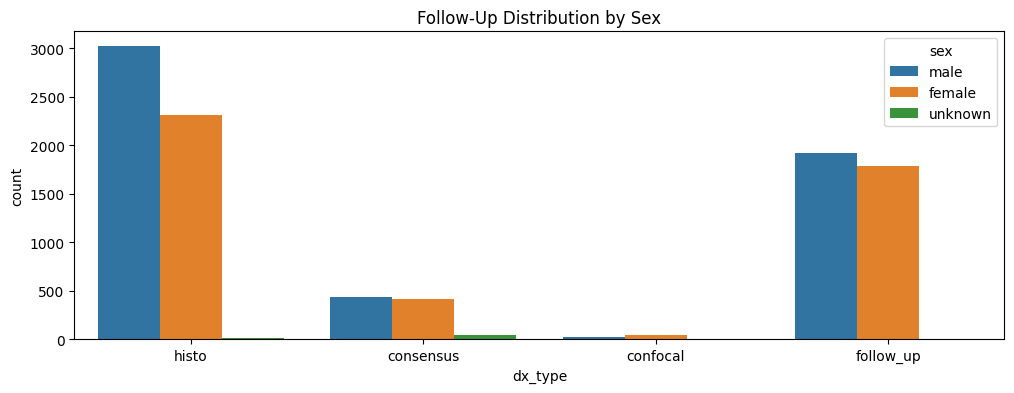

In [25]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

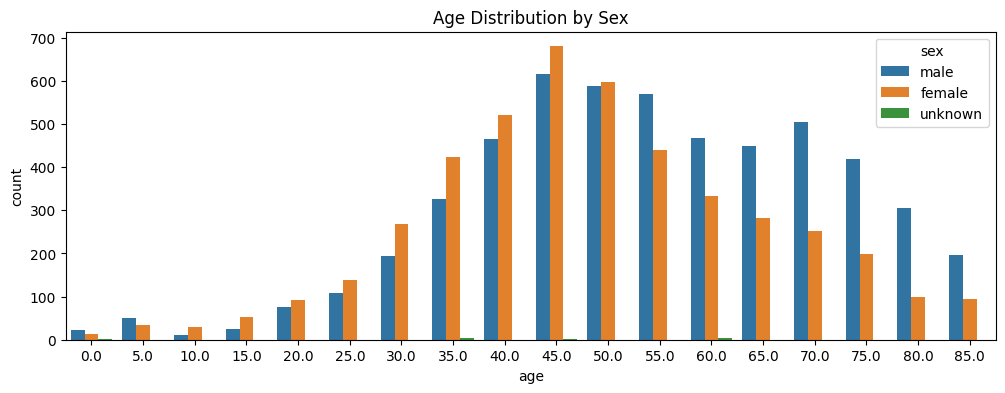

In [26]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

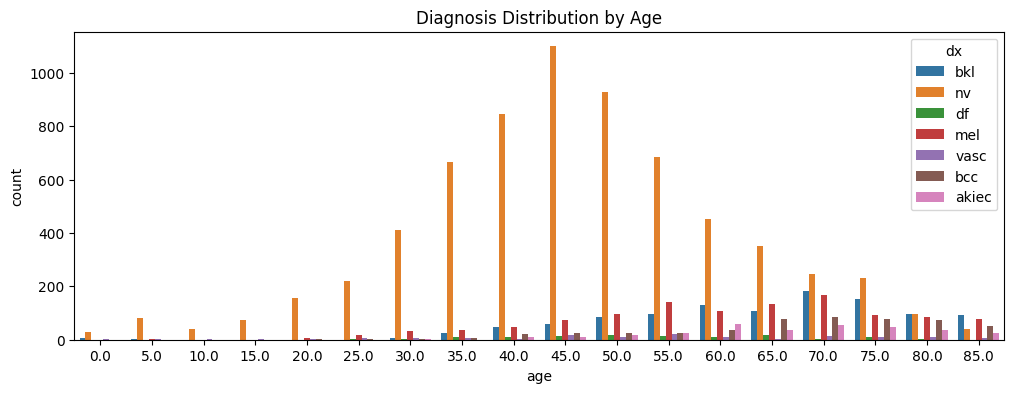

In [27]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

nv is the most dominant disease amongst all the ages

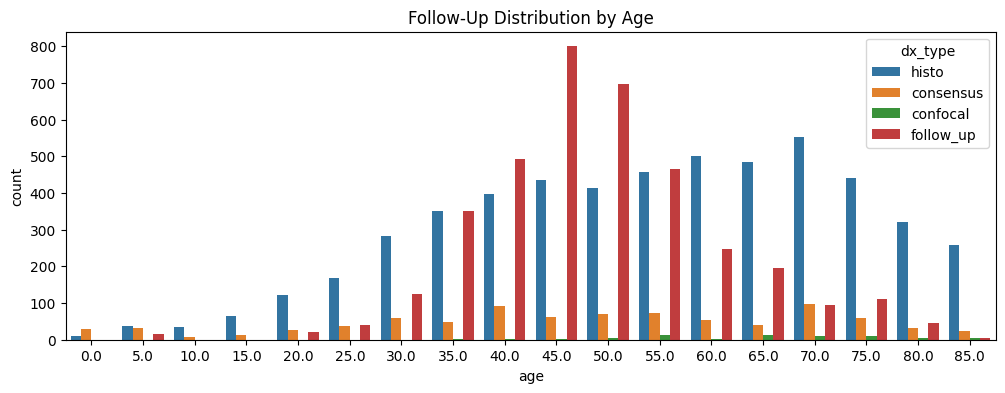

In [28]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

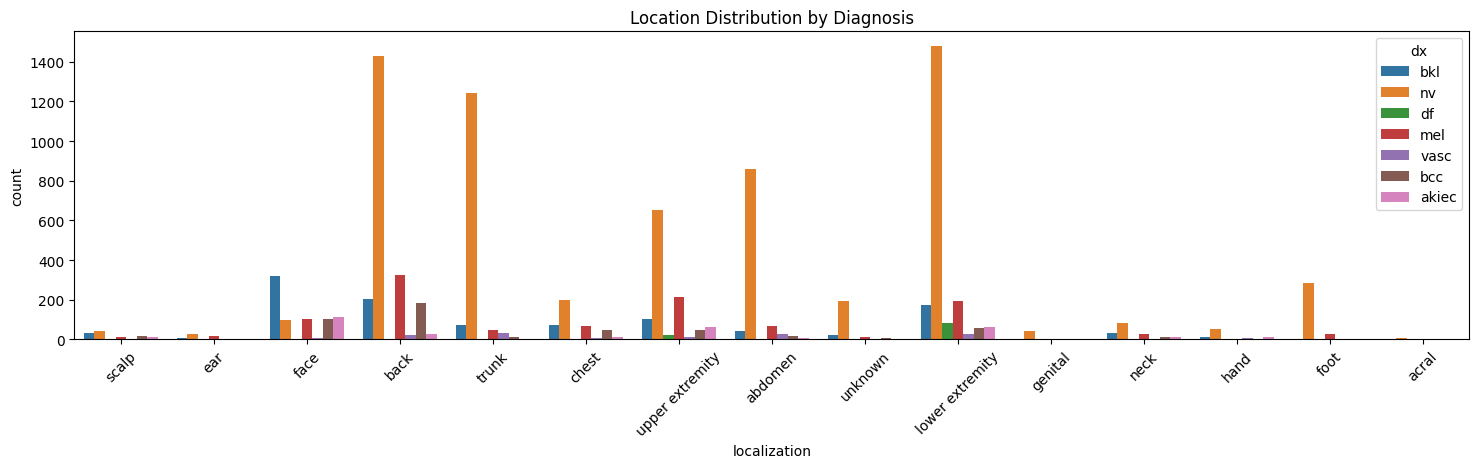

In [29]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

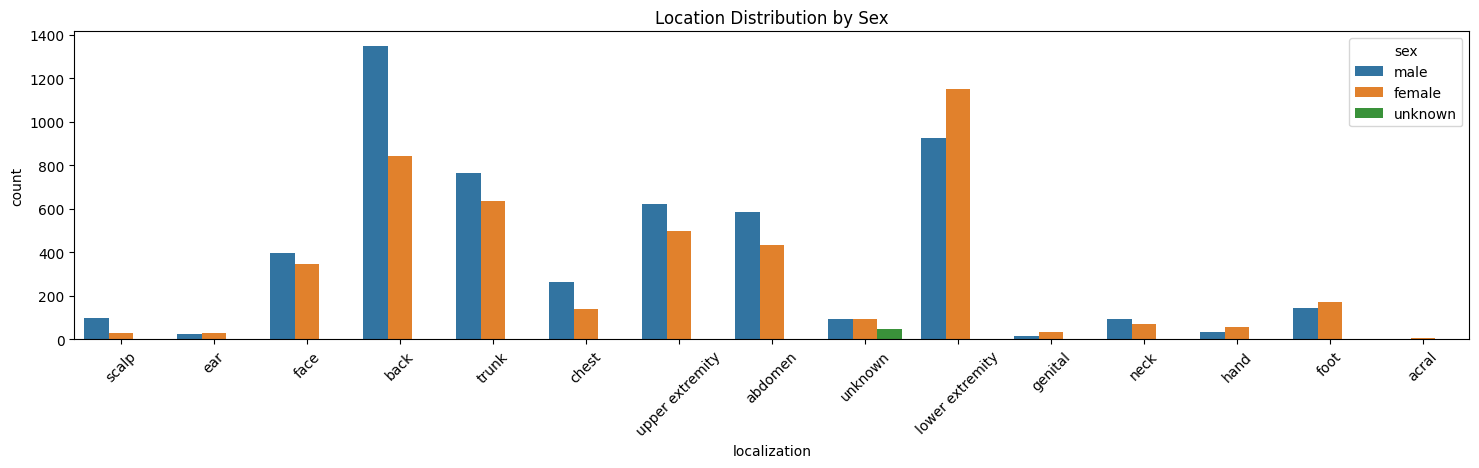

In [30]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

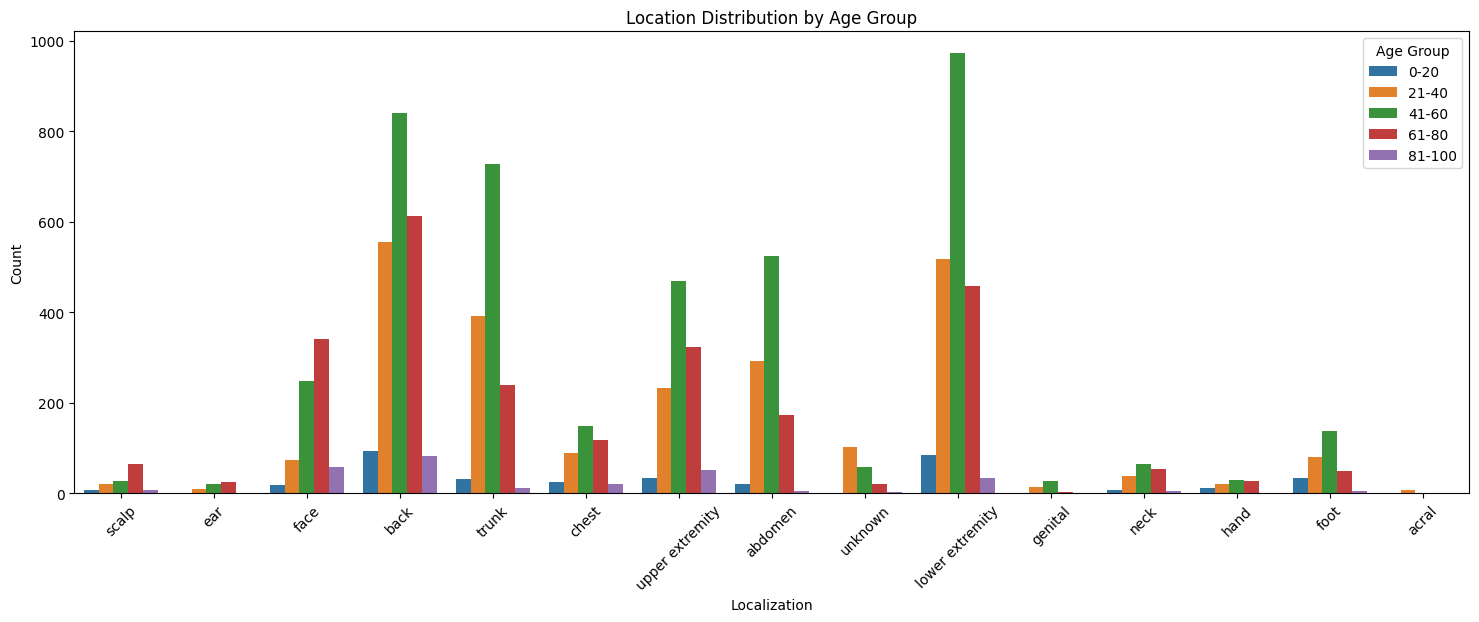

In [31]:
# Assuming 'age' column contains numerical values, create age groups
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Add the age groups as a new column in the DataFrame
meta_data['age_group'] = age_groups

# Visualizing relationships between categorical columns and age groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

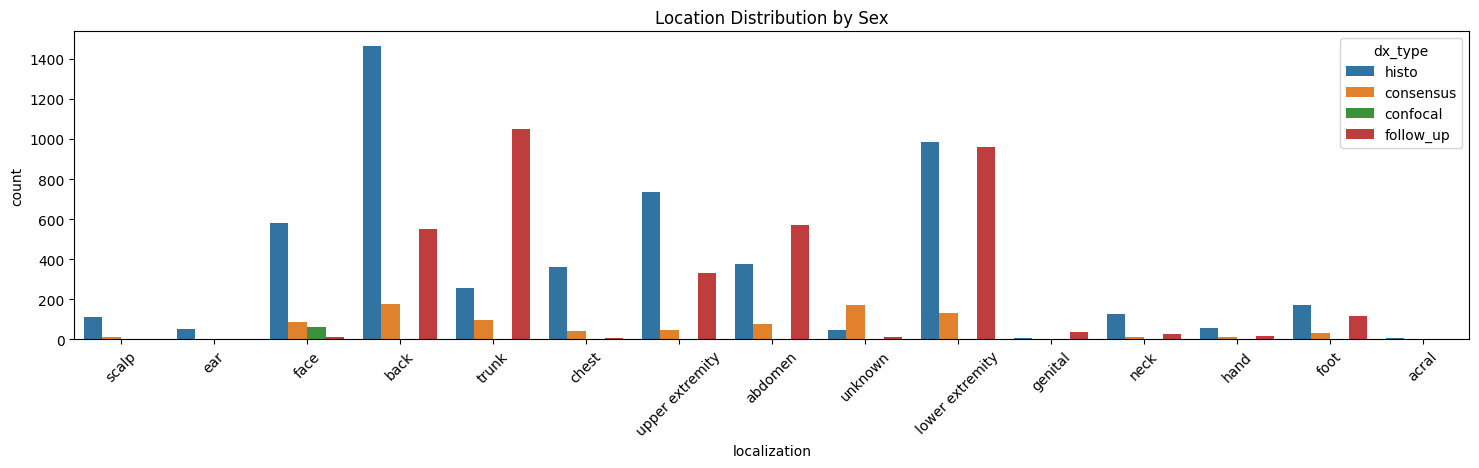

In [32]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

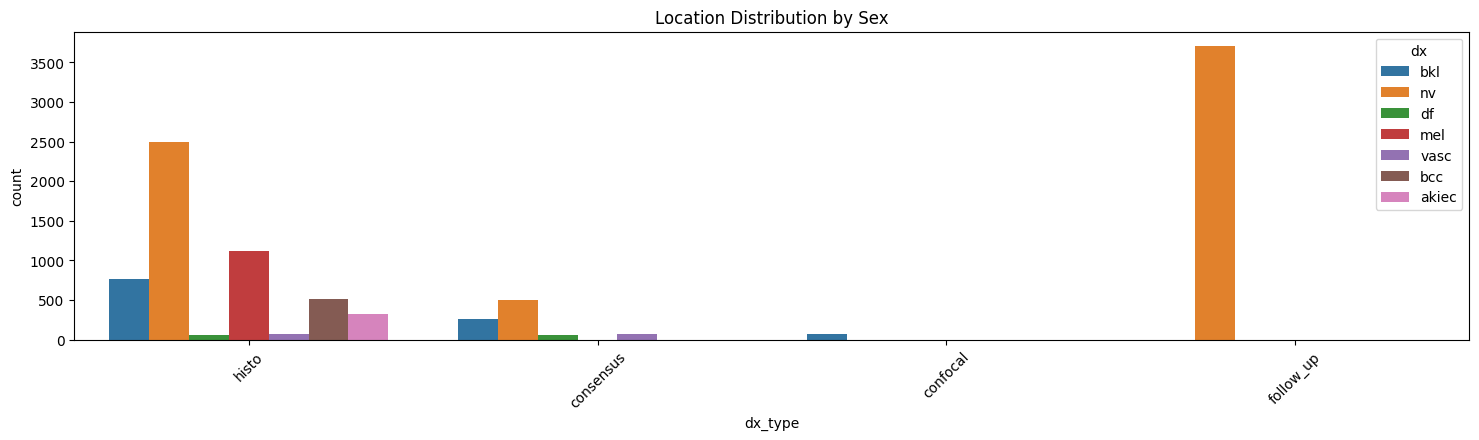

In [33]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

Step 1: Data cleansing involves identifying and correcting errors or inconsistencies in the data.

In [34]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lesion_id     10015 non-null  object  
 1   image_id      10015 non-null  object  
 2   dx            10015 non-null  object  
 3   dx_type       10015 non-null  object  
 4   age           9958 non-null   float64 
 5   sex           10015 non-null  object  
 6   localization  10015 non-null  object  
 7   age_group     9919 non-null   category
dtypes: category(1), float64(1), object(6)
memory usage: 557.8+ KB


In [35]:
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,age_group
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,61-80
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,61-80
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,61-80
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,61-80
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,61-80


In [36]:
# Removing duplicate rows
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

In [37]:
#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [38]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Fixing column names

In [39]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [40]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [41]:
# Define the mapping of current values to new values
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [42]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign Keratosis-Like Lesions


In [43]:
# Convert the Age column to integers

meta_data['Age'] = meta_data['Age'].astype(int)

In [44]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions


# PreProcessing Complete

In [45]:
#Path to the images
image_path1='/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_path2='/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

In [46]:
#Directory for final combined images
final_image_dataset = '/kaggle/working/skin-cancer-mnist-ham10000'

In [47]:
import os
import shutil
# Create the destination folder if it doesn't exist
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

# Iterate through files in folder 1 and copy them to the destination folder
for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):  
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

# Iterate through files in folder 2 and copy them to the destination folder
for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [48]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [49]:
meta_data

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40,male,abdomen,Actinic Keratoses,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40,male,abdomen,Actinic Keratoses,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40,male,abdomen,Actinic Keratoses,/kaggle/working/skin-cancer-mnist-ham10000/ISI...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80,male,face,Actinic Keratoses,/kaggle/working/skin-cancer-mnist-ham10000/ISI...


# Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'Region_Of_Disease' column
meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Updated_Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [51]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Updated_Diagnosis        10015 non-null  object
 8   Image_path               10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


In [52]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path,Updated_Diagnosis_Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,2


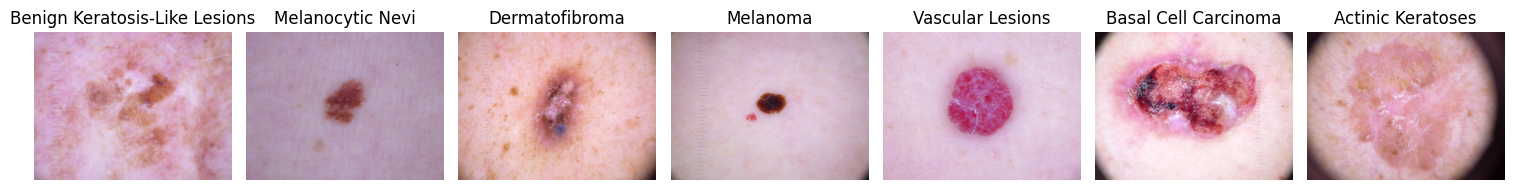

In [53]:
# Ensure that the image paths are correct and accessible
for i in range(len(meta_data)):
    if not os.path.isfile(meta_data['Image_path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {meta_data['Image_path'].iloc[i]}")

# Get one image per class
class_images = meta_data.drop_duplicates(subset='Updated_Diagnosis')

# Plot one image per class
def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Updated_Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot images
plot_class_images(class_images)

# Augment and Balance classes

In [54]:
pip install imgaug opencv-python

Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [56]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

# Define your augmentation pipeline
aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with probability 0.5
    iaa.Affine(rotate=(-10, 10)),  # Random rotation within -10 to 10 degrees
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),  # Random scaling within 90% to 110%
    iaa.Crop(percent=(0, 0.2)),# Crop images from each side by 0% to 20% of their height/width
    iaa.Affine(shear=(-5, 5)),  # Random shear within -5 to 5 degrees
    iaa.GaussianBlur(sigma=(0, 0.5)),  # Gaussian blur with a small sigma
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  # Small additive Gaussian noise
    iaa.ContrastNormalization((0.9, 1.1)),  # Slightly change contrast
    iaa.CLAHE(clip_limit=(1, 2))  # Apply CLAHE with a moderate clip limit
])

# Directory to save augmented images
augmented_images_dir = '/path/to/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

# Get the class counts
class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()

# Create an empty list to hold the balanced samples
balanced_samples = []

# Oversample each class with augmentation to match the class with the maximum count
for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)

            # Save the augmented image
            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)

            # Store the augmented image and update the image path
            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

# Combine all oversampled classes into a single DataFrame
balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

print("Dataset balanced successfully!")

Dataset balanced successfully!


In [57]:
# Rename the DataFrame to meta_data
meta_data = balanced_dataset
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path,Updated_Diagnosis_Label
0,HAM_0001751,ISIC_0024698,nv,consensus,70,male,face,Melanocytic Nevi,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,4
1,HAM_0000559,ISIC_0024693,nv,follow_up,45,female,upper extremity,Melanocytic Nevi,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,4
2,HAM_0004932,ISIC_0032212,nv,follow_up,45,female,foot,Melanocytic Nevi,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,4
3,HAM_0004516,ISIC_0025775,nv,follow_up,45,female,neck,Melanocytic Nevi,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,4
4,HAM_0006510,ISIC_0029828,nv,follow_up,55,female,lower extremity,Melanocytic Nevi,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,4


In [58]:
# Calculate class weights
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 7.0, 1: 7.0, 2: 7.0, 3: 7.0, 4: 7.0, 5: 7.0, 6: 7.0}


In [59]:
# Summary of statistics for numeric features
numeric_summary = meta_data.describe()
numeric_summary_transposed = numeric_summary.transpose()
# Display the summaries
print("Numeric Features Summary:")
numeric_summary_transposed

Numeric Features Summary:


,count,mean,std,min,25%,50%,75%,max
Age,46935.0,63.400341,15.332668,0.0,50.0,70.0,75.0,85.0
Updated_Diagnosis_Label,46935.0,3.000000,2.000021,0.0,1.0,3.0,5.0,6.0


In [60]:
# Summary of statistics for categorical features
categorical_summary = meta_data.describe(include=['object'])
categorical_summary_transposed = categorical_summary.transpose()

print("\nCategorical Features Summary:")
categorical_summary_transposed


Categorical Features Summary:


,count,unique,top,freq
Lesion_Id,46935,7470,HAM_0003597,6592
Image_Id,46935,10015,ISIC_0027488,6591
Diagnosis,46935,7,nv,6705
Confirmation_Method,46935,4,histo,29107
Sex,46935,3,male,24151
Region_Of_Disease,46935,15,face,12729
Updated_Diagnosis,46935,7,Melanocytic Nevi,6705
Image_path,46935,46935,/kaggle/working/skin-cancer-mnist-ham10000/ISI...,1
